# Data exploration

In [1]:
import h5py
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

from ariel import *

In [2]:
rng = np.random.default_rng()
i = rng.integers(N_ANNOTATED)
i

7239

## Spectra

In [3]:
spectrafile = h5py.File("data/train/spectra.hdf5", "r")
grp = spectrafile["Planet_" + str(i)]
grp.keys()

<KeysViewHDF5 ['instrument_noise', 'instrument_spectrum', 'instrument_width', 'instrument_wlgrid']>

In [4]:
spectrum = grp["instrument_spectrum"][:]
noise = grp["instrument_noise"][:]
width = grp["instrument_width"][:]
wlgrid = grp["instrument_wlgrid"][:]

In [5]:
spectrum.dtype, spectrum.shape

(dtype('float64'), (52,))

In [6]:
noise.dtype, noise.shape

(dtype('float64'), (52,))

In [7]:
width.dtype, width.shape

(dtype('float64'), (52,))

In [8]:
wlgrid.dtype, wlgrid.shape

(dtype('float64'), (52,))

In [9]:
spectrum.mean()

0.02294326270902845

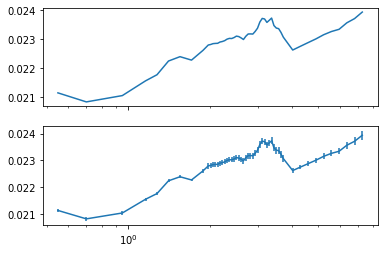

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(wlgrid, spectrum)
ax2.errorbar(wlgrid, spectrum, noise)
ax2.set_xscale("log")

In [11]:
# reverse order?
wlgrid

array([7.2755592 , 6.81373911, 6.3812333 , 5.97618103, 5.59683967,
       5.24157722, 4.90886524, 4.59727234, 4.30545796, 4.03216667,
       3.72344897, 3.65008232, 3.57816128, 3.50765736, 3.43854266,
       3.37078978, 3.30437191, 3.23926272, 3.17543645, 3.11286781,
       3.05153202, 2.99140478, 2.93246229, 2.8746812 , 2.81803862,
       2.76251213, 2.70807972, 2.65471985, 2.60241139, 2.5511336 ,
       2.50086619, 2.45158925, 2.40328325, 2.35592908, 2.30950797,
       2.26400154, 2.21939176, 2.17566098, 2.13279186, 2.09076743,
       2.04957106, 2.00918641, 1.9695975 , 1.88361302, 1.70849254,
       1.5496531 , 1.40558104, 1.27490344, 1.156375  , 0.95      ,
       0.7       , 0.55      ])

In [12]:
N_WAVES = wlgrid.shape[0]
N_WAVES

52

In [13]:
width

array([0.47747067, 0.44716295, 0.41877904, 0.39219681, 0.36730191,
       0.34398722, 0.32215244, 0.30170364, 0.28255283, 0.26461764,
       0.07410399, 0.07264385, 0.07121248, 0.06980931, 0.06843379,
       0.06708537, 0.06576353, 0.06446773, 0.06319746, 0.06195222,
       0.06073151, 0.05953486, 0.05836179, 0.05721183, 0.05608453,
       0.05497945, 0.05389614, 0.05283417, 0.05179313, 0.0507726 ,
       0.04977218, 0.04879147, 0.04783008, 0.04688764, 0.04596377,
       0.0450581 , 0.04417028, 0.04329995, 0.04244677, 0.0416104 ,
       0.04079051, 0.03998678, 0.03919888, 0.18409541, 0.16697996,
       0.15145575, 0.13737483, 0.12460302, 0.11301861, 0.30767045,
       0.20416667, 0.10083333])

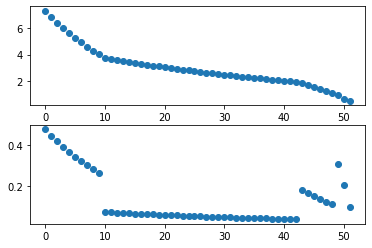

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.scatter(np.arange(N_WAVES), wlgrid)
ax2.scatter(np.arange(N_WAVES), width)

## Auxillary table

In [15]:
auxiliary = pd.read_csv("data/train/auxiliary_table.csv", index_col="planet_ID")
auxiliary

,star_distance,star_mass_kg,star_radius_m,star_temperature,planet_mass_kg,planet_orbital_period,planet_distance,planet_radius_m,planet_surface_gravity
planet_ID,,,,,,,,,
0,100.0510,1.531871e+30,612216000.0,5053.0,4.994682e+25,3.646200,0.042501,1.751739e+07,10.389141
1,28.2938,1.536643e+30,542646000.0,5071.0,3.040857e+25,16.201656,0.114991,1.309706e+07,11.315104
2,258.8930,1.888989e+30,688743000.0,5416.0,9.850620e+25,88.406553,0.381830,2.628654e+07,9.099284
3,1010.2800,2.087830e+30,751356000.0,5900.0,1.954940e+28,3.575320,0.046513,7.040038e+07,251.764117
4,1070.1700,2.028178e+30,953109000.0,5866.0,5.997680e+25,31.588900,0.196877,1.964499e+07,9.919505
...,...,...,...,...,...,...,...,...,...
91387,491.6220,2.050597e+30,730485000.0,5925.1,3.779878e+27,4.847033,0.056630,1.135206e+08,18.721422
91388,316.2280,2.444501e+30,980937000.0,6287.0,5.845108e+27,8.493018,0.087271,1.322829e+08,21.320410
91389,1050.6400,1.869105e+30,667872000.0,5888.0,2.922920e+25,5.687945,0.061092,1.286362e+07,11.274586


## Forward model parameter table

In [16]:
fm_parameter = pd.read_csv("data/train/ground_truth/fm_parameter_table.csv", index_col="planet_ID")
fm_parameter

,planet_temp,log_H2O,log_CO2,log_CH4,log_CO,log_NH3
planet_ID,,,,,,
0,1108.725067,-6.484809,-7.016512,-3.294729,-3.351913,-6.955828
1,636.858130,-8.829193,-8.603965,-5.501124,-4.799371,-6.020019
2,420.527609,-6.626830,-6.420932,-6.755727,-5.318471,-4.695118
3,1370.906116,-7.639372,-5.877303,-4.476840,-5.200010,-6.240726
4,746.170076,-4.172605,-6.899335,-6.360434,-4.140252,-8.896858
...,...,...,...,...,...,...
91387,1230.274532,-5.610091,-7.173193,-5.096518,-3.397266,-4.400357
91388,1218.571572,-8.306286,-4.758709,-3.964018,-3.146747,-5.339986
91389,1125.496097,-5.410777,-8.539973,-8.684864,-5.008298,-8.062786


Text(0.5, 0, 'Planet temperature')

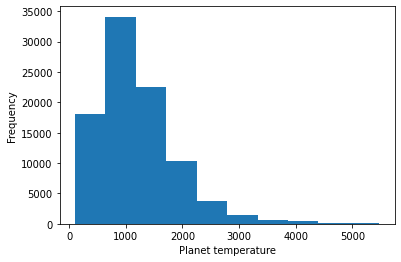

In [17]:
ax = fm_parameter["planet_temp"].plot.hist()
ax.set_xlabel("Planet temperature")

Text(0.5, 0, 'log H$_2$O')

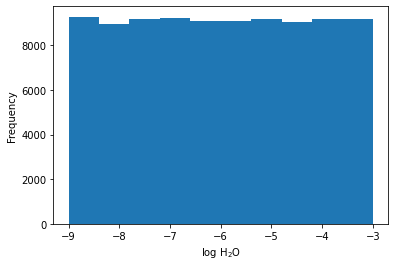

In [18]:
ax = fm_parameter["log_H2O"].plot.hist()
ax.set_xlabel("log H$_2$O")

Text(0.5, 0, 'log CO$_2$')

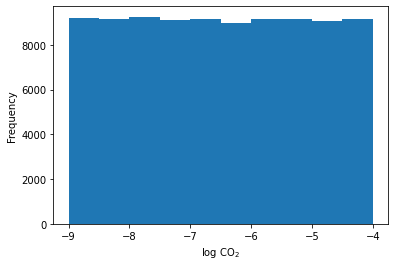

In [19]:
ax = fm_parameter["log_CO2"].plot.hist()
ax.set_xlabel("log CO$_2$")

Text(0.5, 0, 'log CH$_4$')

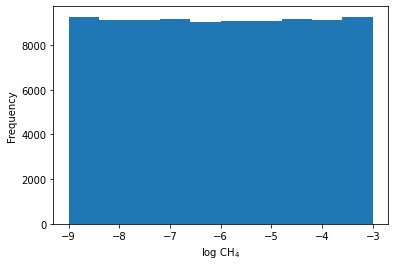

In [20]:
ax = fm_parameter["log_CH4"].plot.hist()
ax.set_xlabel("log CH$_4$")

Text(0.5, 0, 'log CO')

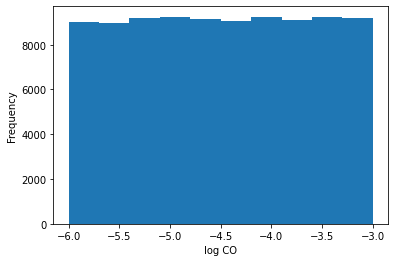

In [21]:
ax = fm_parameter["log_CO"].plot.hist()
ax.set_xlabel("log CO")

Text(0.5, 0, 'log NH$_3$')

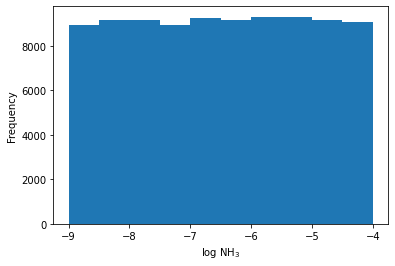

In [22]:
ax = fm_parameter["log_NH3"].plot.hist()
ax.set_xlabel("log NH$_3$")

## Quartiles table

In [23]:
quartiles = pd.read_csv("data/train/ground_truth/quartiles_table.csv", index_col="planet_ID")
quartiles

,T_q1,T_q2,T_q3,log_H2O_q1,log_H2O_q2,log_H2O_q3,log_CO2_q1,log_CO2_q2,log_CO2_q3,log_CH4_q1,log_CH4_q2,log_CH4_q3,log_CO_q1,log_CO_q2,log_CO_q3,log_NH3_q1,log_NH3_q2,log_NH3_q3
planet_ID,,,,,,,,,,,,,,,,,,
0,1096.754060,1109.490687,1122.716570,-10.884421,-8.867972,-6.684767,-10.153066,-7.434079,-6.823955,-3.346453,-3.291427,-3.229520,-4.082412,-3.399877,-3.042125,-11.019125,-8.890987,-6.977170
1,616.072976,636.977475,657.582228,-11.095211,-9.323549,-7.452824,-10.785395,-9.247521,-8.291703,-5.672253,-5.513984,-5.337995,-5.203368,-4.816855,-4.414735,-6.255204,-6.029390,-5.839559
2,411.059375,420.392211,429.156294,-10.450308,-7.773855,-6.522569,-6.884896,-6.449624,-6.060706,-8.724523,-7.086556,-6.492432,-5.972764,-5.390598,-4.929774,-4.773786,-4.668049,-4.556866
3,1357.964612,1382.813499,1409.892455,-10.882759,-8.827417,-6.804879,-6.073258,-5.891995,-5.733862,-4.529318,-4.478272,-4.430260,-10.659858,-7.749673,-5.096800,-10.860119,-7.922047,-6.382086
4,737.588375,746.177998,756.234493,-4.254871,-4.172825,-4.098340,-7.180686,-6.927282,-6.680215,-6.618038,-6.397635,-6.210865,-4.543197,-4.166813,-3.835200,-11.185112,-9.489310,-7.766874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Traces

In [24]:
tracefile = h5py.File("data/train/ground_truth/traces.hdf5", "r")
tracegrp = tracefile["Planet_" + str(i)]
tracegrp.keys()

<KeysViewHDF5 ['tracedata', 'weights']>

In [25]:
tracegrp["tracedata"]

<HDF5 dataset "tracedata": shape (3228, 6), type "<f8">

In [26]:
tracegrp.attrs["ID"], tracegrp.attrs["target_order"]

(7239,
 array(['T', 'log_H2O', 'log_CO2', 'log_CH4', 'log_CO', 'log_NH3'],
       dtype=object))

In [27]:
tracedata = tracegrp["tracedata"][:]
tracedata.shape, tracedata.dtype

((3228, 6), dtype('float64'))

In [28]:
weights = tracegrp["weights"][:]
weights.shape, weights.dtype

((3228,), dtype('float64'))

In [29]:
fm_parameter.loc[i, "planet_temp"], quartiles.loc[i, ["T_q1", "T_q2", "T_q3"]]

(2871.174310510247,
 T_q1    2810.547455
 T_q2    2877.639225
 T_q3    2937.654249
 Name: 7239, dtype: float64)

In [30]:
mean = (tracedata[:, 0] @ weights)
var = (weights @ ((tracedata[:, 0] - mean) ** 2))
std = np.sqrt(var)
weights.sum(), mean, var, std

(1.0000000000000002, 2876.545616808952, 4152.964107641265, 64.44349546417594)

In [31]:
np.square(tracedata.T - weights) @ weights

array([8.27866260e+06, 2.34873182e+01, 7.14976370e+01, 2.06524881e+01,
       5.17022533e+01, 2.13497933e+01])

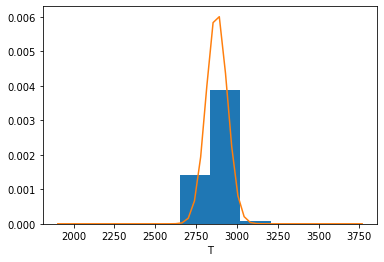

In [32]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 0], density=True, weights=weights)
ax.set_xlabel("T")
x = np.linspace(np.min(tracedata[:, 0]), np.max(tracedata[:, 0]))
y = norm.pdf(x, loc=mean, scale=std)
ax.plot(x, y)

Text(0.5, 0, 'log_H2O')

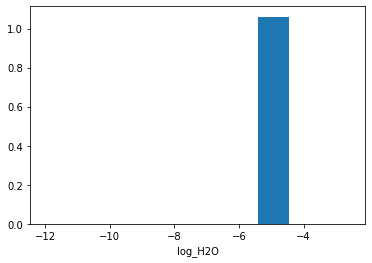

In [33]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 1], density=True, weights=weights)
ax.set_xlabel("log_H2O")

In [34]:
fm_parameter.loc[i, "log_H2O"], quartiles.loc[i, ["log_H2O_q1", "log_H2O_q2", "log_H2O_q3"]]

(-4.845404355476619,
 log_H2O_q1   -4.937137
 log_H2O_q2   -4.846043
 log_H2O_q3   -4.749287
 Name: 7239, dtype: float64)

Text(0.5, 0, 'log_CO2')

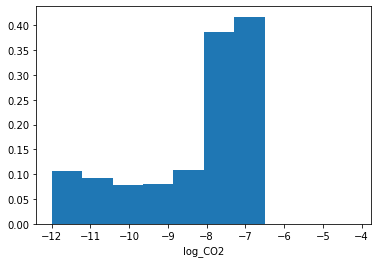

In [35]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 2], density=True, weights=weights)
ax.set_xlabel("log_CO2")

In [36]:
fm_parameter.loc[i, "log_CO2"], quartiles.loc[i, ["log_CO2_q1", "log_CO2_q2", "log_CO2_q3"]]

(-7.362095272404814,
 log_CO2_q1   -10.372620
 log_CO2_q2    -7.524799
 log_CO2_q3    -7.111216
 Name: 7239, dtype: float64)

In [37]:
mean = (tracedata[:, 3] @ weights)
var = (weights @ ((tracedata[:, 3] - mean) ** 2))
std = np.sqrt(var)
weights.sum(), mean, var, std

(1.0000000000000002,
 -4.542597909837253,
 0.009317995720391254,
 0.09652976598123117)

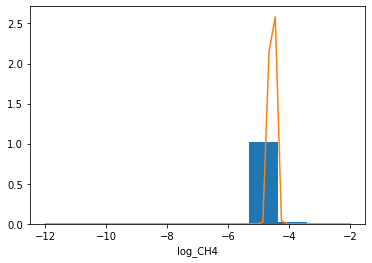

In [38]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 3], density=True, weights=weights)
ax.set_xlabel("log_CH4")
x = np.linspace(-12, -2)
y = norm.pdf(x, loc=mean, scale=std)
ax.plot(x, y)

In [39]:
fm_parameter.loc[i, "log_CH4"], quartiles.loc[i, ["log_CH4_q1", "log_CH4_q2", "log_CH4_q3"]]

(-4.533225810223813,
 log_CH4_q1   -4.637558
 log_CH4_q2   -4.541525
 log_CH4_q3   -4.449061
 Name: 7239, dtype: float64)

Text(0.5, 0, 'log_CO')

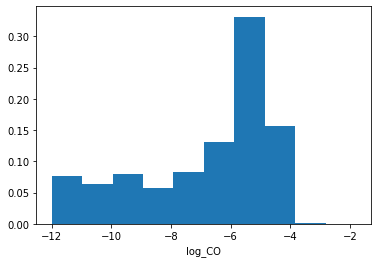

In [40]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 4], density=True, weights=weights)
ax.set_xlabel("log_CO")

In [41]:
fm_parameter.loc[i, "log_CO"], quartiles.loc[i, ["log_CO_q1", "log_CO_q2", "log_CO_q3"]]

(-5.512918631224741,
 log_CO_q1   -9.738588
 log_CO_q2   -5.892750
 log_CO_q3   -4.856226
 Name: 7239, dtype: float64)

Text(0.5, 0, 'log_NH3')

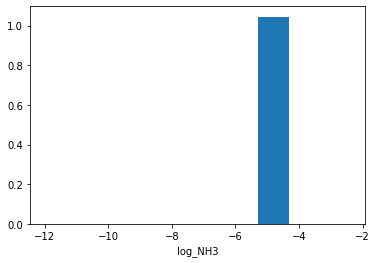

In [42]:
fig, ax = plt.subplots()
ax.hist(tracedata[:, 5], density=True, weights=weights)
ax.set_xlabel("log_NH3")

In [43]:
fm_parameter.loc[i, "log_NH3"], quartiles.loc[i, ["log_NH3_q1", "log_NH3_q2", "log_NH3_q3"]]

(-4.610009381073695,
 log_NH3_q1   -4.711303
 log_NH3_q2   -4.615516
 log_NH3_q3   -4.528653
 Name: 7239, dtype: float64)